#### Phân tích lỗi

### Data vlsp 2018 + Model có BI

In [2]:
import pandas as pd

data_error = pd.read_csv("/Users/phamvanmanh/Documents/GitHub/NER_MOCKPROJECT/crf_model/vlsp2018/vlsp_2018_not_BI.csv")


In [19]:
ner_tags = data_error["true_ner"].unique()

In [3]:
data_error[data_error['is_error'] ==1]

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
5,1,5,Trạm,Np,B-LOC,O,1
6,1,6,Biên,Np,I-LOC,O,1
7,1,7,phòng,N,I-LOC,O,1
8,1,8,Mũi,Np,I-LOC,B-PER,1
9,1,9,Tấn,Np,I-LOC,I-PER,1
...,...,...,...,...,...,...,...
66440,3207,10,Thám,Np,I-ORG,I-LOC,1
66453,3207,23,tạo,V,I-ORG,O,1
66454,3207,24,Quận,Np,I-ORG,B-LOC,1
66455,3207,25,Ba,Np,I-ORG,I-LOC,1


In [51]:
# số lượng LOC nhầm sang ORG, PER, O, MISC
import matplotlib.pyplot as plt

def show_analyst_error(df, ner_tag = "B-LOC", is_error = 1):
    print(ner_tag)
    if ner_tag != "all":
        df_check = df.loc[(df.is_error == is_error) & (df.true_ner == ner_tag)]
        print(ner_tag)
        fig = plt.figure(figsize=(4, 3), dpi=80)
        ax = fig.add_axes([0,0,1,1])
   
        fig.suptitle('Error of ' + ner_tag )
        df_check_grouped = df_check.groupby("predict_ner").size()
        ner_tag = df_check_grouped.keys()
        values = df_check_grouped
        ax.bar(ner_tag,values)
        return plt.show()
    
    if ner_tag == "all":
        ner_tags = df["true_ner"].unique()
        for ner in ner_tags:
            df_check = df.loc[(df.is_error == is_error) & (df.true_ner == ner)]
            fig = plt.figure(figsize=(4, 3), dpi=80)
            ax = fig.add_axes([0,0,1,1])
            fig.suptitle('Error of ' +ner )
            df_check_grouped = df_check.groupby("predict_ner").size()
            ner_tag = df_check_grouped.keys()
            values = df_check_grouped
            ax.bar(ner_tag,values)
            
        return plt.show()

all


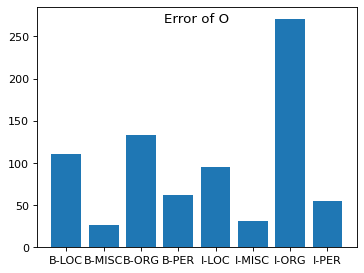

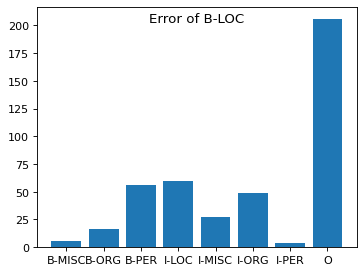

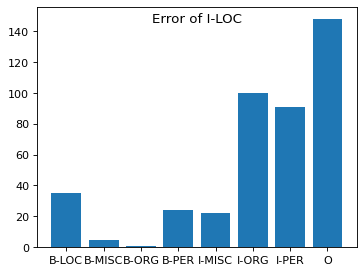

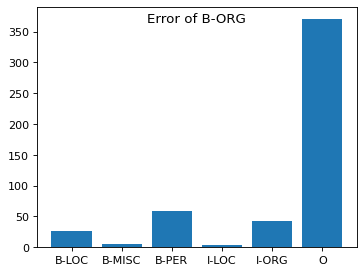

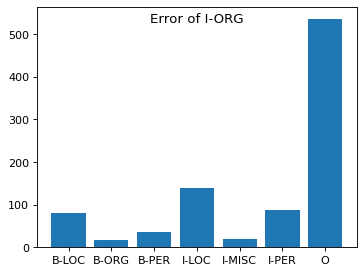

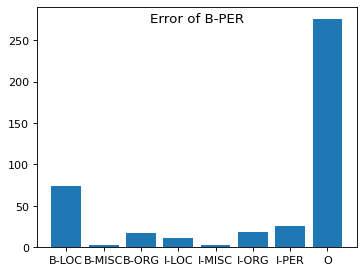

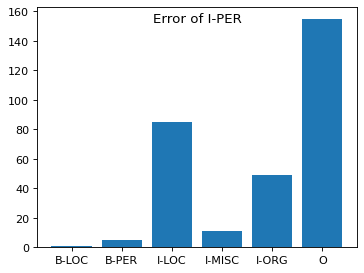

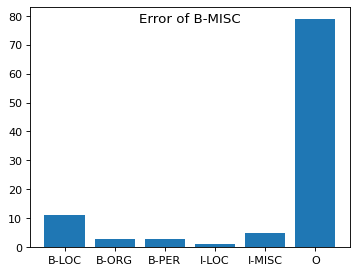

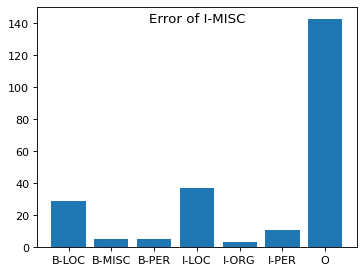

In [52]:
show_analyst_error(data_error, ner_tag = "all", is_error = 1)

Nhãn B-MISC nhầm sang các nhãn: B-LOC, B-ORG, I-LOC..., chủ yếu nhầm sang nhãn O

In [34]:
# df_per = data_error.loc[(data_error.is_error == 1) & (data_error.true_ner == "B-MISC")]
# df_per.groupby("word").size().sort_values(ascending=False)
data_error.loc[(data_error.true_ner == "B-MISC") & (data_error.is_error == 1)]["#sent"].to_numpy()

array([ 114,  233,  404,  404,  474,  517,  518,  519,  520,  523,  555,
        556,  786,  786,  786, 1283, 1285, 1287, 1297, 1387, 1389, 1391,
       1394, 1396, 1396, 1397, 1398, 1401, 1410, 1535, 1557, 1629, 1758,
       1760, 1774, 1779, 1791, 1941, 1946, 1974, 2021, 2030, 2258, 2261,
       2262, 2262, 2263, 2266, 2266, 2283, 2284, 2284, 2285, 2286, 2286,
       2329, 2331, 2333, 2333, 2393, 2418, 2419, 2419, 2473, 2587, 2587,
       2588, 2593, 2597, 2615, 2628, 2702, 2709, 2720, 2721, 2765, 2766,
       2768, 2769, 2776, 2777, 2777, 2778, 2779, 2780, 2782, 2799, 2800,
       2801, 2802, 2806, 2807, 2808, 2812, 2812, 2812, 2812, 2812, 2827,
       2830, 2832, 2895])

In [53]:
data_error.loc[data_error["#sent"] == 517]
data_error.loc[data_error["#sent"] == 518]

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
12864,518,0,Tàu,Np,B-MISC,O,1
12865,518,1,sân,N,I-MISC,O,1
12866,518,2,bay,V,I-MISC,O,1
12867,518,3,Mỹ,Np,I-MISC,B-LOC,1
12868,518,4,Ronald,Np,I-MISC,B-PER,1
12869,518,5,Reagan,Np,I-MISC,I-PER,1
12870,518,6,đang,R,O,O,0
12871,518,7,tiến,V,O,O,0
12872,518,8,hành,V,O,O,0
12873,518,9,tập,V,O,O,0


nhầm nhãn